<a href="https://colab.research.google.com/github/gwenLemur/CalcProject/blob/main/MainRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge

In [56]:
#get a single factor values
def getColumn(arr, index):
  arrSlim = arr[:, index]
  return arrSlim


In [57]:
feature = pd.read_csv('https://raw.githubusercontent.com/gwenLemur/CalcProject/main/factor.csv')
label = pd.read_csv('https://raw.githubusercontent.com/gwenLemur/CalcProject/main/result.csv')
XtrainMulti = feature.values
Ytrain = label.values
#get a single factor values
Xtrain = getColumn(XtrainMulti, 0)
#make into column
Xtrain = Xtrain.reshape(-1,1)
Ytrain = Ytrain.reshape(-1,1)

print(Xtrain.shape, Ytrain.shape)


(10, 1) (10, 1)


In [58]:
Xtrain, Xval, Ytrain, Yval = train_test_split(Xtrain, Ytrain, test_size=5, random_state=10, shuffle=True, stratify=None)

(5, 1)
MSE Train:  0.48979591836734715
MSE Val:  0.49795918367346914


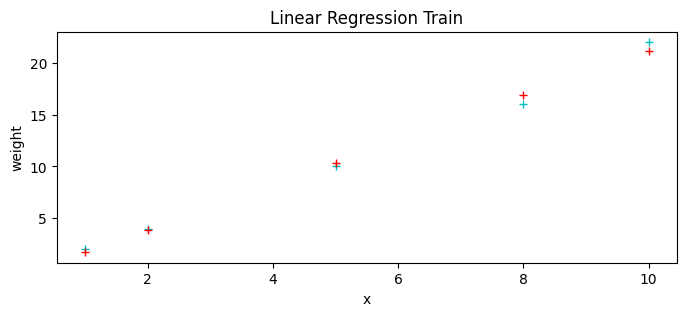

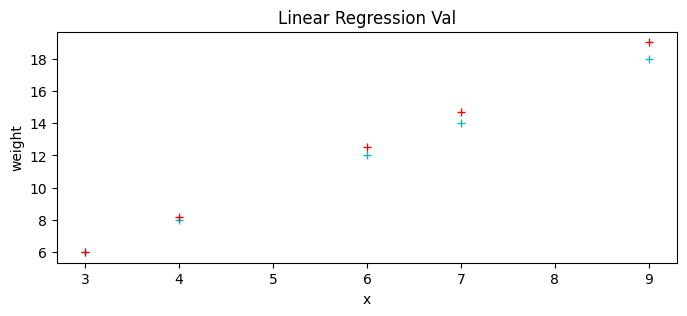

In [59]:
# linear regression model and MSE:
feat=label.columns.to_list()


X = label[feat].values
regr = LinearRegression(fit_intercept=True)
regr.fit(Xtrain,Ytrain)


yTrainPred = regr.predict(Xtrain) # Model prediction
print(yTrainPred.shape)


yValPred = regr.predict(Xval)


#MSE
mse_yTrain = np.mean(np.sqrt((Ytrain-yTrainPred)**2))
mse_yVal = np.mean(np.sqrt((Yval-yValPred)**2))
print("MSE Train: ", mse_yTrain)
print("MSE Val: ",mse_yVal)


fig1 = plt.figure(figsize=(8,3))
plt.title('Linear Regression Train')
plt.ylabel('weight')
plt.xlabel('x')
plt.plot(Xtrain, Ytrain, 'c+')
plt.plot(Xtrain, yTrainPred, 'r+')


fig3 = plt.figure(figsize=(8,3))
plt.title('Linear Regression Val')
plt.ylabel('weight')
plt.xlabel('x')
plt.plot(Xval, Yval, 'c+')
plt.plot(Xval, yValPred, 'r+')